### 4. **Análisis de Cohortes**
**Resumen:** El análisis de cohortes permite agrupar datos según características específicas y observar cómo se comportan a lo largo del tiempo. Se centra en cohortes de precios y ventas para entender las dinámicas del mercado.

1. **Cohortes Basadas en Precios Promedios Trimestrales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `Date`.
   - **Esperado:** Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
     - Agrupa los datos por trimestre usando `pd.Grouper` con `freq='Q'`.
     - Calcula el promedio de `AveragePrice` y suma `Total Volume` para cada cohorte.
     - Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.

2. **Cohortes por Región y Fecha:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice`, `Total Volume`, `region` y `Date`.
   - **Esperado:** Analiza cómo varían las cohortes de diferentes regiones.
     - Agrupa los datos por `region` y `Date` usando `groupby()`.
     - Calcula el promedio de precios y volumen para cada cohorte.
     - Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.

3. **Análisis de Cohortes en Función del Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.

4. **Cohortes de Clientes Basadas en Ventas:**
   - **Uso de Datos:** Usa las columnas `Total Volume`, `Date` y `region`.
   - **Esperado:** Analiza el comportamiento de las cohortes según el volumen de ventas.
     - Clasifica los clientes según su volumen de compras.
     - Visualiza las cohortes en gráficos de líneas o barras que muestren el comportamiento de compra a lo largo del tiempo.

5. **Evaluación de Retención de Ventas por Cohorte:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Estudia cómo se retienen las ventas en cohortes a lo largo de un año.
     - Agrupa los datos por mes y cohortes.
     - Calcula la retención de ventas y visualiza los resultados en un gráfico de líneas que muestre las tasas de retención.



In [1]:
# Cargar librerias
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
sys.path.append('../../../aguacate-aljoan/')  # Adjust to the path where utils is located
from utils.data import obtener_nuevo_avocado, imputar_fechas

df_orig = imputar_fechas()

#df_orig = pd.read_csv("avocado_with_region_types.csv")

# guardamos el original y trabajamos con una copia
df = df_orig.copy()
# Convierte Date a tipo datetime usando pd.to_datetime().
# Convierte la columna de fecha a un formato adecuado.

df['Date'] = pd.to_datetime(df['Date'])

# Filtrar los datos para 'GreaterRegion' en la columna 'region_type'
df_reduced = df.loc[df['region_type'] == 'GreaterRegion'].copy()
df_cities = df.loc[df['region_type'] == 'City'].copy()
df_regions = df.loc[df['region_type'] == 'Region'].copy()

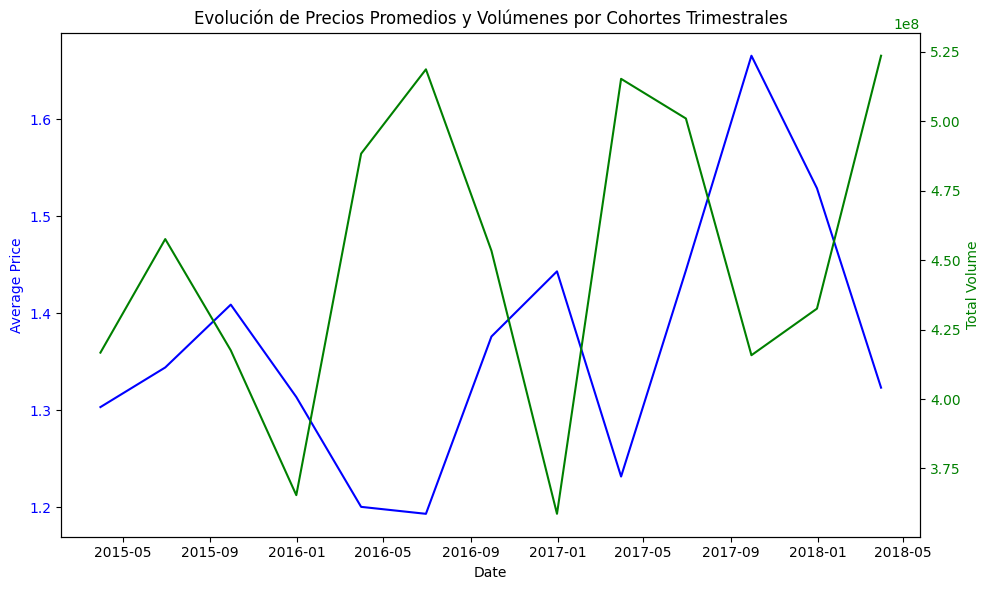

In [2]:
"""
4.1. Cohortes Basadas en Precios Promedios Trimestrales:

Uso de Datos: Usa las columnas AveragePrice, Total Volume y Date.
Esperado: Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
Agrupa los datos por trimestre usando pd.Grouper con freq='Q'.
Calcula el promedio de AveragePrice y suma Total Volume para cada cohorte.
Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes
"""
# 4.1. Cohortes Basadas en Precios Promedios Trimestrales

# Group by quarter and calculate the mean of 'AveragePrice' and sum of 'Total Volume'

df['Date'] = pd.to_datetime(df['Date'])

# Group by quarter and calculate the mean of 'AveragePrice' and sum of 'Total Volume'
quarterly_data = df_reduced.groupby(pd.Grouper(key='Date', freq='QE')).agg(
    AveragePrice=('AveragePrice', 'mean'),
    TotalVolume=('Total Volume', 'sum')
).reset_index()

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot AveragePrice on the left y-axis
ax1.plot(quarterly_data['Date'], quarterly_data['AveragePrice'], label='Average Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot TotalVolume
ax2 = ax1.twinx()
ax2.plot(quarterly_data['Date'], quarterly_data['TotalVolume'], label='Total Volume', color='green')
ax2.set_ylabel('Total Volume', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and show the plot
plt.title('Evolución de Precios Promedios y Volúmenes por Cohortes Trimestrales')
fig.tight_layout()  # Adjust the layout to avoid overlap
plt.show()


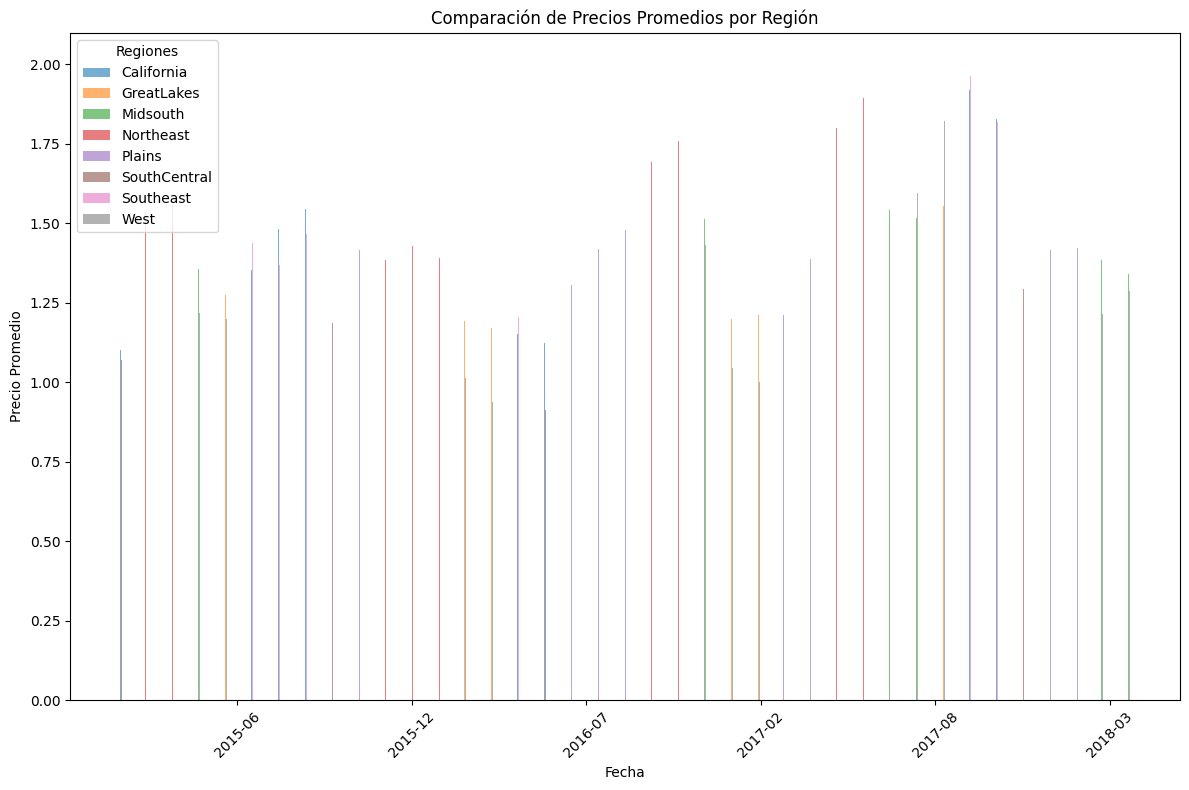

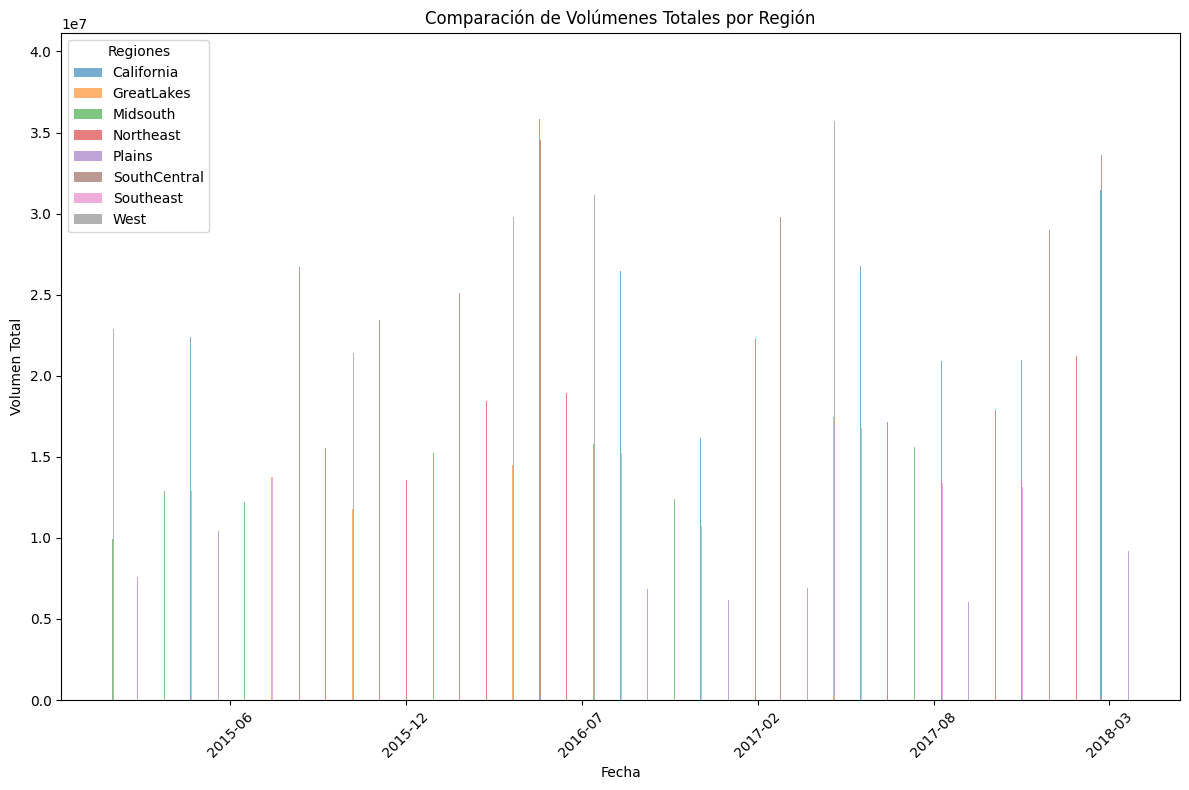

In [3]:
# Plotting the results using bar charts
import matplotlib.dates as mdates

# Group by 'region' and 'Date', calculating the mean of 'AveragePrice' and sum of 'Total Volume'
region_date_data = df_reduced.groupby(['region', pd.Grouper(key='Date', freq='ME')]).agg(
    AveragePrice=('AveragePrice', 'mean'),
    TotalVolume=('Total Volume', 'sum')
).reset_index()

# Create a plot for Average Price by Region
plt.figure(figsize=(12, 8))
regions = region_date_data['region'].unique()

# Set the width of the bars
bar_width = 0.2

# Define the positions on the x-axis for each region
for i, region in enumerate(regions):
    region_data = region_date_data[region_date_data['region'] == region]
    
    # Shift the bars slightly by modifying their position
    x_positions = mdates.date2num(region_data['Date']) + (bar_width * i)  # Convert to numerical date values

    # Plot bars
    plt.bar(x_positions, region_data['AveragePrice'], width=bar_width, label=region, alpha=0.6)

plt.title('Comparación de Precios Promedios por Región')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend(title='Regiones', loc='upper left')

# Format x-axis with date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a plot for Total Volume by Region
plt.figure(figsize=(12, 8))

# Plot bars for Total Volume
for i, region in enumerate(regions):
    region_data = region_date_data[region_date_data['region'] == region]
    
    # Shift the bars slightly by modifying their position
    x_positions = mdates.date2num(region_data['Date']) + (bar_width * i)  # Convert to numerical date values

    # Plot bars
    plt.bar(x_positions, region_data['TotalVolume'], width=bar_width, label=region, alpha=0.6)

plt.title('Comparación de Volúmenes Totales por Región')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total')
plt.legend(title='Regiones', loc='upper left')

# Format x-axis with date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

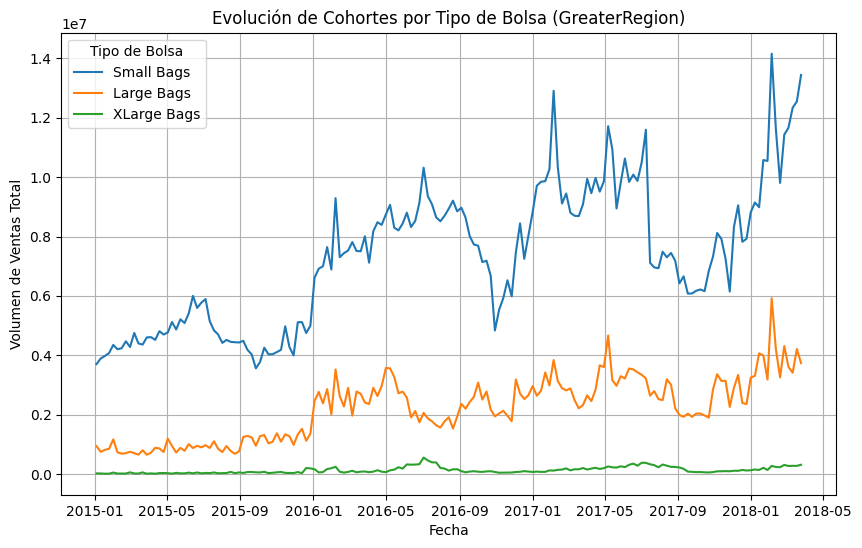

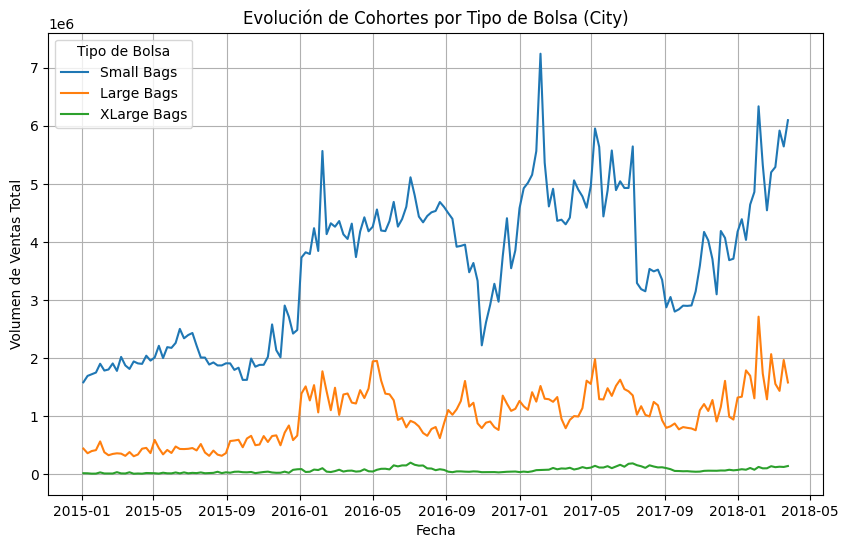

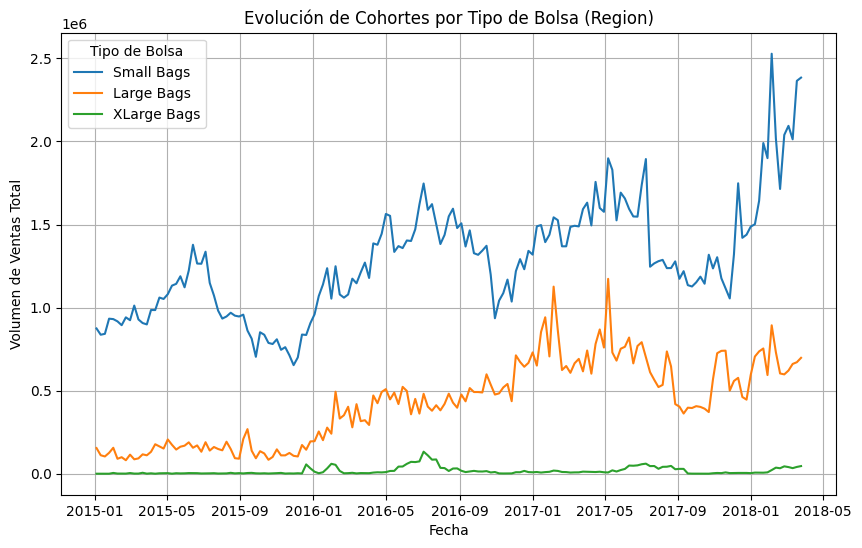

In [5]:
"""
4.3. **Análisis de Cohortes en Función del Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.
"""
# 4.3 Análisis de Cohortes en Función del Tipo de Bolsa
import matplotlib.pyplot as plt
import pandas as pd

dfs = [df_reduced, df_cities, df_regions]
labels = ['GreaterRegion', 'City', 'Region']
bag_types = ['Small Bags', 'Large Bags', 'XLarge Bags']

for df, label in zip(dfs, labels):
    # Group by bag type and date
    cohorts = df.groupby(['Date'])[['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].sum().reset_index()

    # Plotting the cohorts
    plt.figure(figsize=(10, 6))
    for bag_type in bag_types:
        plt.plot(cohorts['Date'], cohorts[bag_type], label=bag_type)

    plt.title(f'Evolución de Cohortes por Tipo de Bolsa ({label})')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen de Ventas Total')
    plt.legend(title='Tipo de Bolsa')
    plt.grid(True)
    plt.show()


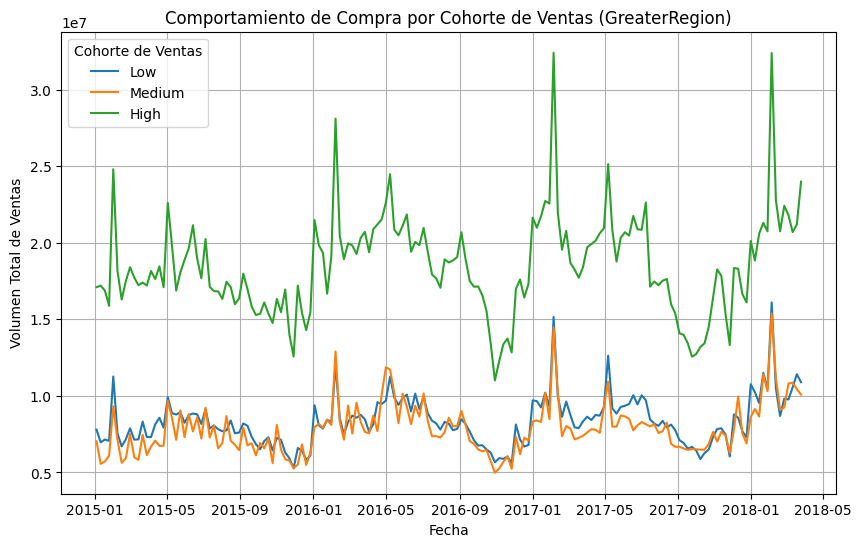

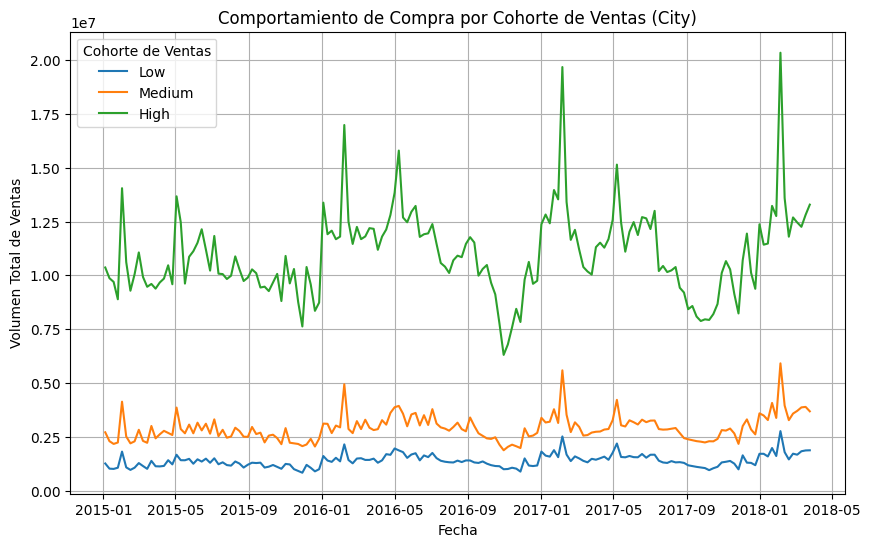

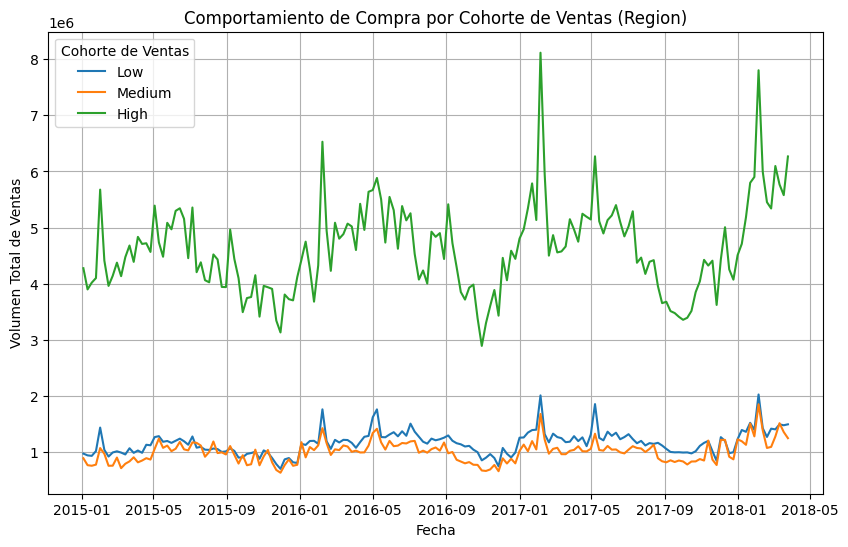

In [6]:
"""
4.4. **Cohortes de Clientes Basadas en Ventas:**
   - **Uso de Datos:** Usa las columnas `Total Volume`, `Date` y `region`.
   - **Esperado:** Analiza el comportamiento de las cohortes según el volumen de ventas.
     - Clasifica los clientes según su volumen de compras.
     - Visualiza las cohortes en gráficos de líneas o barras que muestren el comportamiento de compra a lo largo del tiempo.
"""
# 4.4
import matplotlib.pyplot as plt
import pandas as pd

dfs = [df_reduced, df_cities, df_regions]
labels = ['GreaterRegion', 'City', 'Region']

for df, label in zip(dfs, labels):
    # Calculate total sales volume per region
    region_sales = df.groupby('region')['Total Volume'].sum().reset_index()

    # Classify regions into sales volume cohorts (e.g., high, medium, low)
    region_sales['Sales Cohort'] = pd.qcut(region_sales['Total Volume'], 3, labels=['Low', 'Medium', 'High'])

    # Merge sales cohort back into the original DataFrame
    df = pd.merge(df, region_sales[['region', 'Sales Cohort']], on='region', how='left')

    # Group by sales cohort and date to analyze purchase behavior
    cohort_behavior = df.groupby(['Sales Cohort', 'Date'], observed=False)['Total Volume'].sum().reset_index()
#    cohort_behavior = df.groupby(['Sales Cohort', 'Date'])['Total Volume'].sum().reset_index() # to be deprecated

    # Visualize cohort behavior using line plots
    plt.figure(figsize=(10, 6))
    for cohort in cohort_behavior['Sales Cohort'].unique():
        cohort_data = cohort_behavior[cohort_behavior['Sales Cohort'] == cohort]
        plt.plot(cohort_data['Date'], cohort_data['Total Volume'], label=cohort)

    plt.title(f'Comportamiento de Compra por Cohorte de Ventas ({label})')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen Total de Ventas')
    plt.legend(title='Cohorte de Ventas')
    plt.grid(True)
    plt.show()

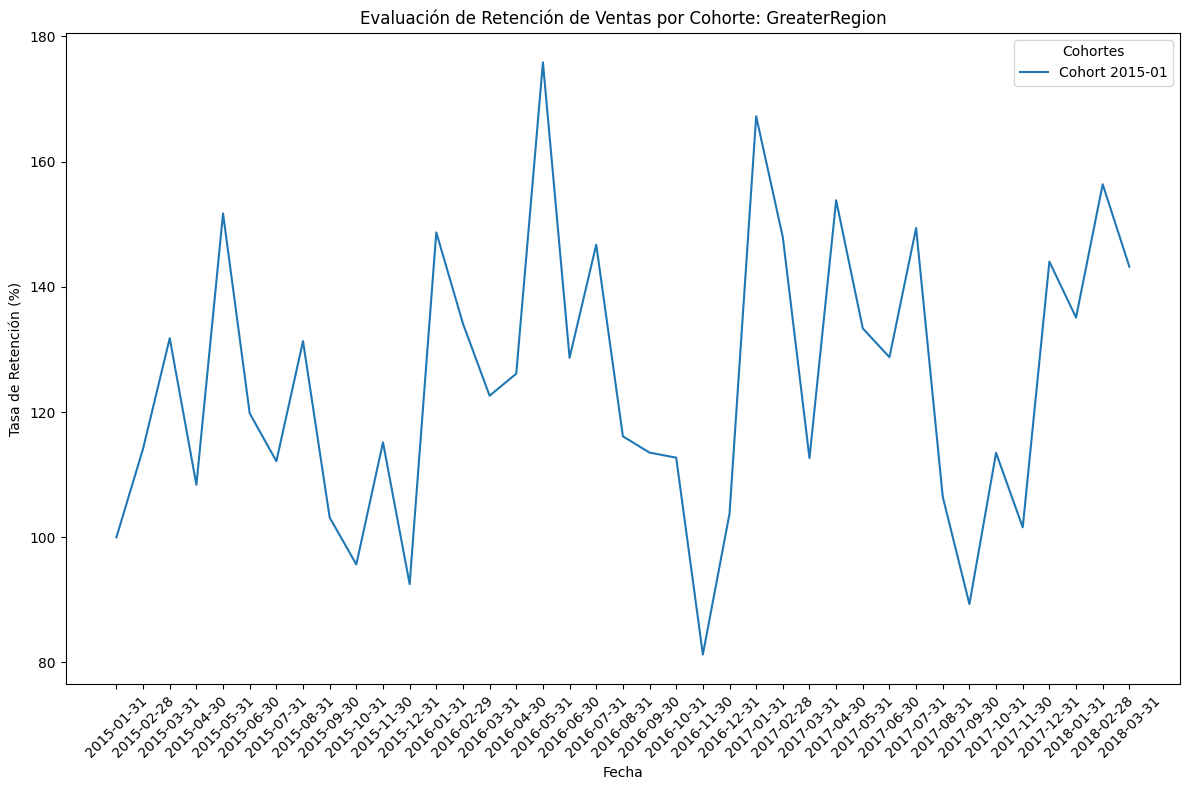

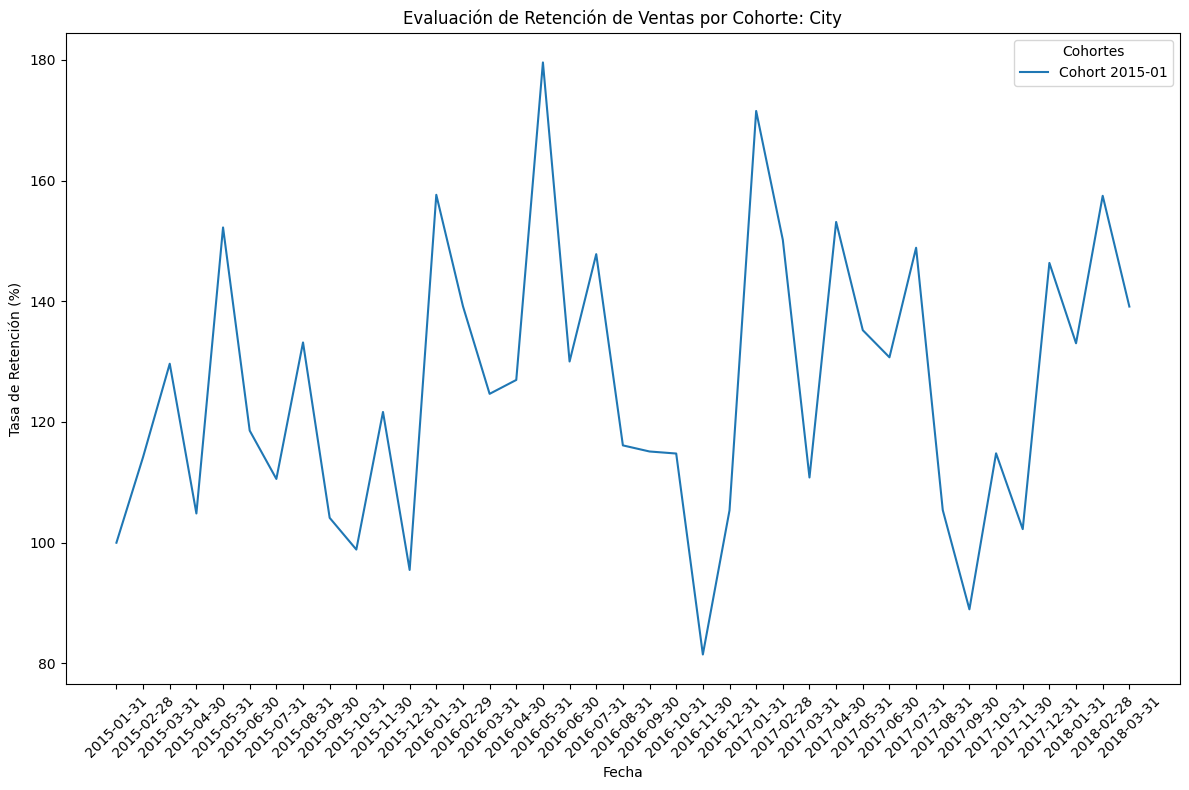

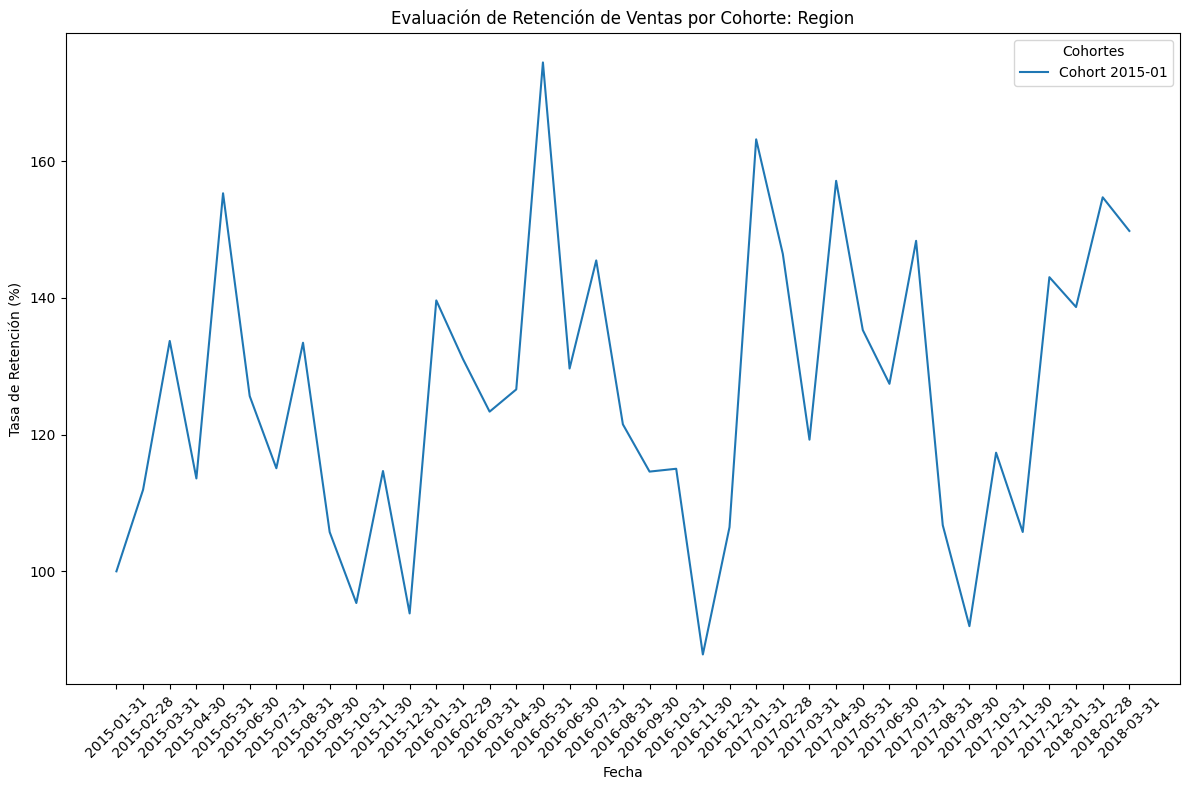

In [7]:
"""
4.5. **Evaluación de Retención de Ventas por Cohorte:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Estudia cómo se retienen las ventas en cohortes a lo largo de un año.
     - Agrupa los datos por mes y cohortes.
     - Calcula la retención de ventas y visualiza los resultados en un gráfico de líneas que muestre las tasas de retención.
"""
# 4.5 Evaluación de Retención de Ventas por Cohorte

dfs = [df_reduced, df_cities, df_regions]
labels = ['GreaterRegion', 'City', 'Region']
i = 0
# Loop para calcular y visualizar las cohortes
for df, label in zip(dfs, labels):


    # Set the first purchase month for each row (cohort) - we use the first month for each region's sales
    df['CohortMonth'] = df.groupby('region')['Date'].transform('min').dt.to_period('M')
    
    # Group by CohortMonth and Date, then calculate the total volume for each group
    cohort_data = df.groupby(['CohortMonth', pd.Grouper(key='Date', freq='ME')])['Total Volume'].sum().reset_index()
    
    # Calculate retention rates for each cohort
    cohort_pivot = cohort_data.pivot_table(index='CohortMonth', columns='Date', values='Total Volume')
    
    # Calculate the retention by dividing the total volume of each cohort by the volume in the first month
    cohort_retention = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)
    
    # Plot the retention rates
    plt.figure(figsize=(12, 8))
    
    for cohort in cohort_retention.index:
        plt.plot(cohort_retention.columns.astype(str), cohort_retention.loc[cohort] * 100, label=f'Cohort {cohort}')
    
    plt.title(f'Evaluación de Retención de Ventas por Cohorte: {labels[i]}')
    plt.xlabel('Fecha')
    plt.ylabel('Tasa de Retención (%)')
    plt.legend(title='Cohortes', loc='best')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    i += 1